In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

In [17]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<AxesSubplot: >

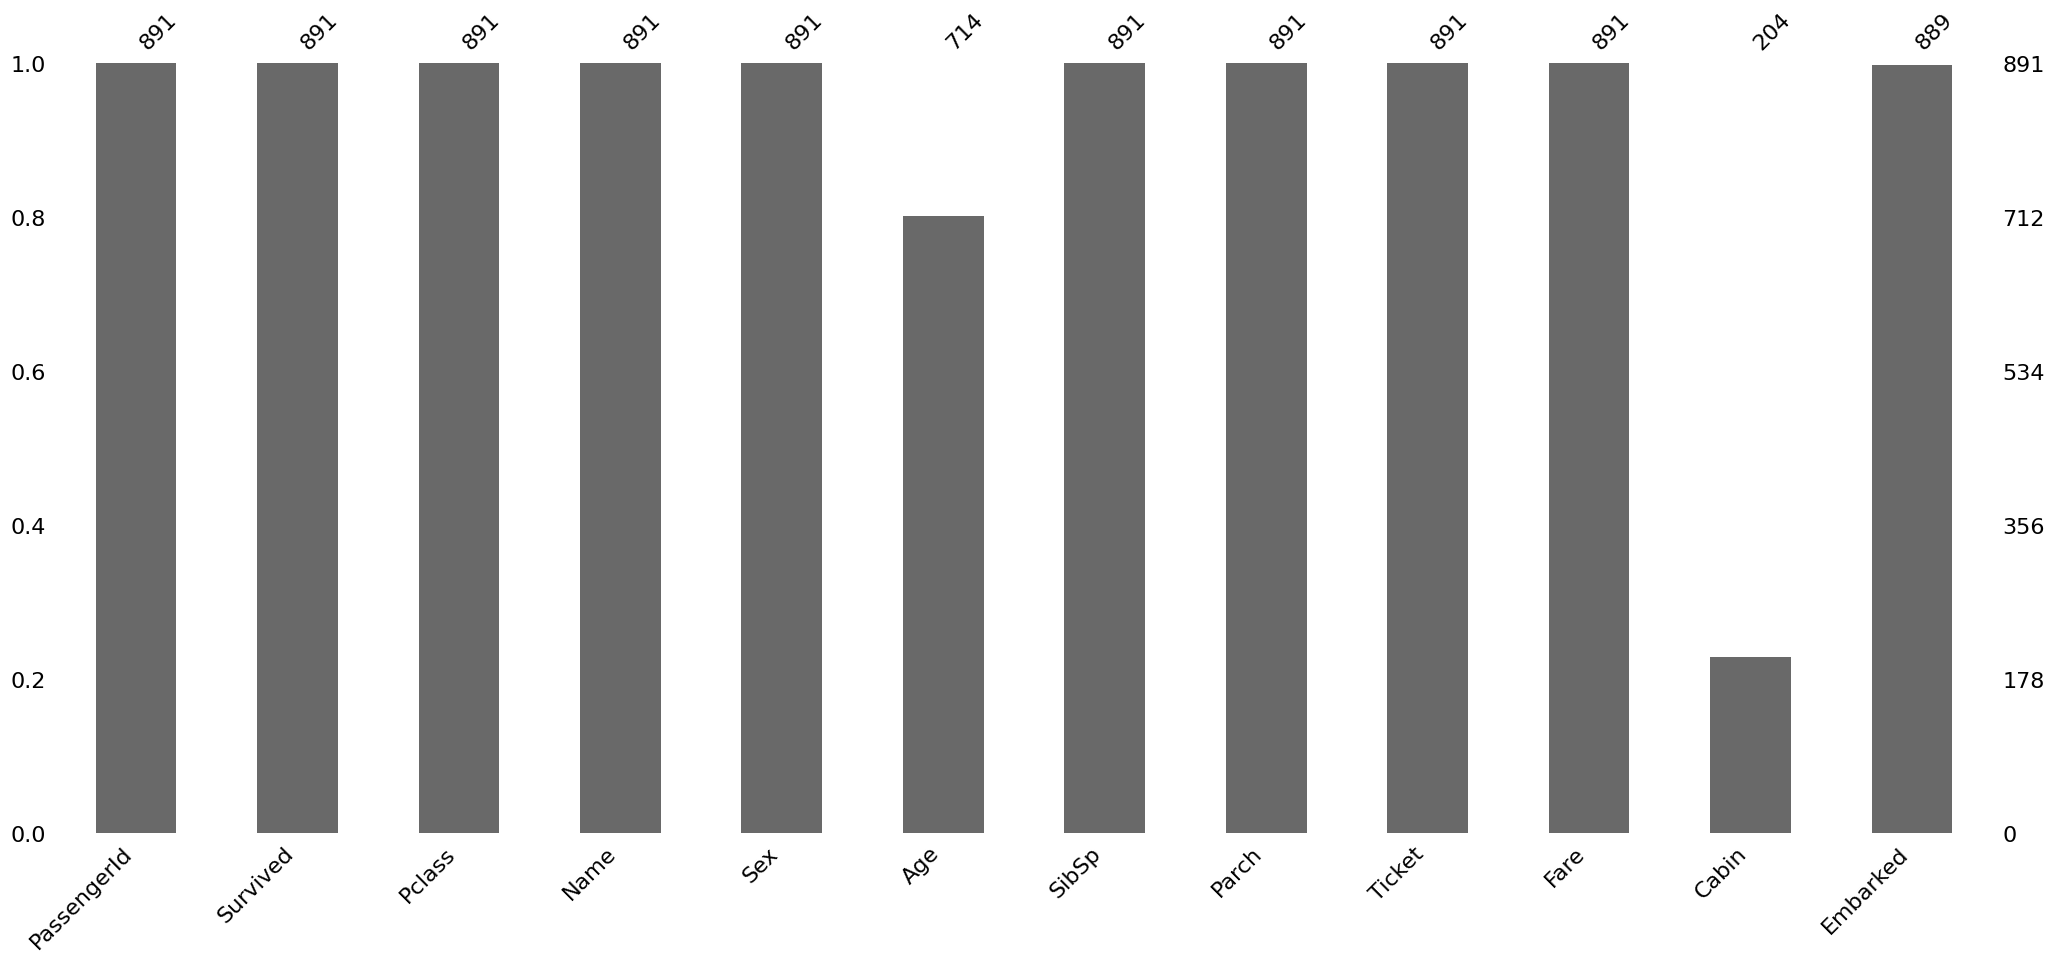

In [22]:
msno.bar(df = train) # 결측값이 age와 cabin에 있다

In [27]:
train['Survived'].sum()

342

In [31]:
train['Survived'].sum()/len(train['Survived'])

0.3838383838383838

# EDA

In [45]:
train[['Survived', 'Pclass']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


 ## Pclass

<AxesSubplot: xlabel='Pclass'>

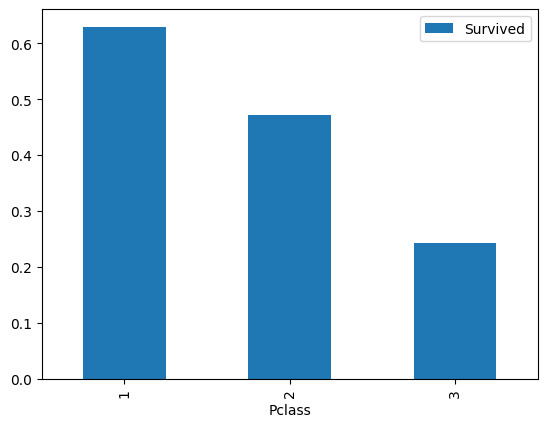

In [54]:
train[['Pclass', 'Survived']].groupby('Pclass', as_index = True).mean().sort_values(by='Survived', ascending=False).plot.bar()

Pclass가 좋을수록 생존률이 높다

## Sex

<AxesSubplot: xlabel='Sex'>

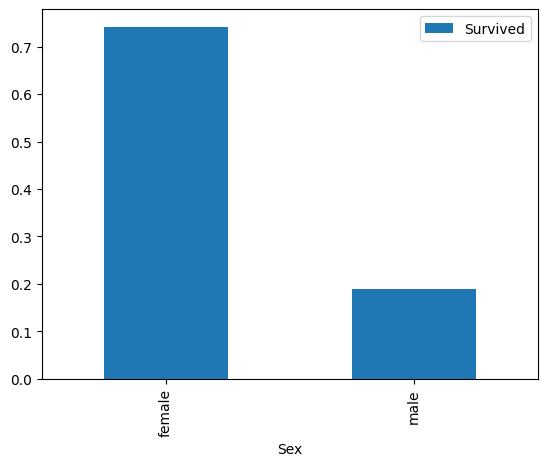

In [55]:
train[['Sex', 'Survived']].groupby('Sex', as_index = True).mean().sort_values(by='Survived', ascending=False).plot.bar()

## Age

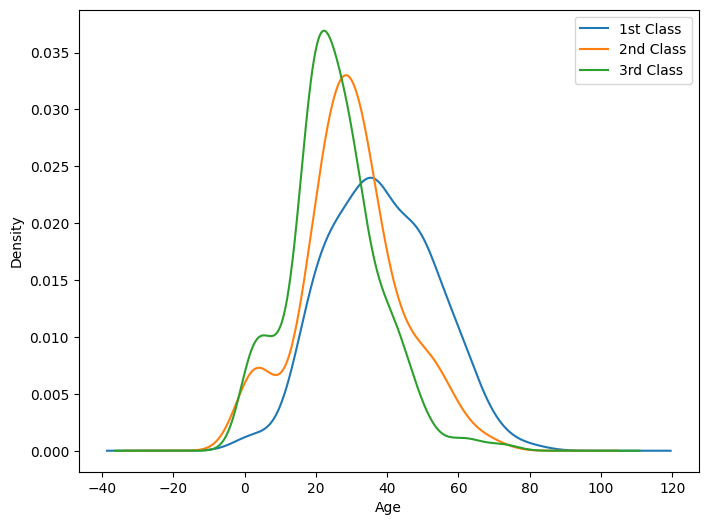

In [81]:
plt.figure(figsize=(8, 6))
train['Age'][train['Pclass'] == 1].plot(kind='kde')
train['Age'][train['Pclass'] == 2].plot(kind='kde')
train['Age'][train['Pclass'] == 3].plot(kind='kde')

plt.xlabel("Age")
plt.legend(['1st Class', '2nd Class', '3rd Class'])

나이가 어릴수록 낮은 class를 이용했다

<AxesSubplot: xlabel='Sex', ylabel='Age'>

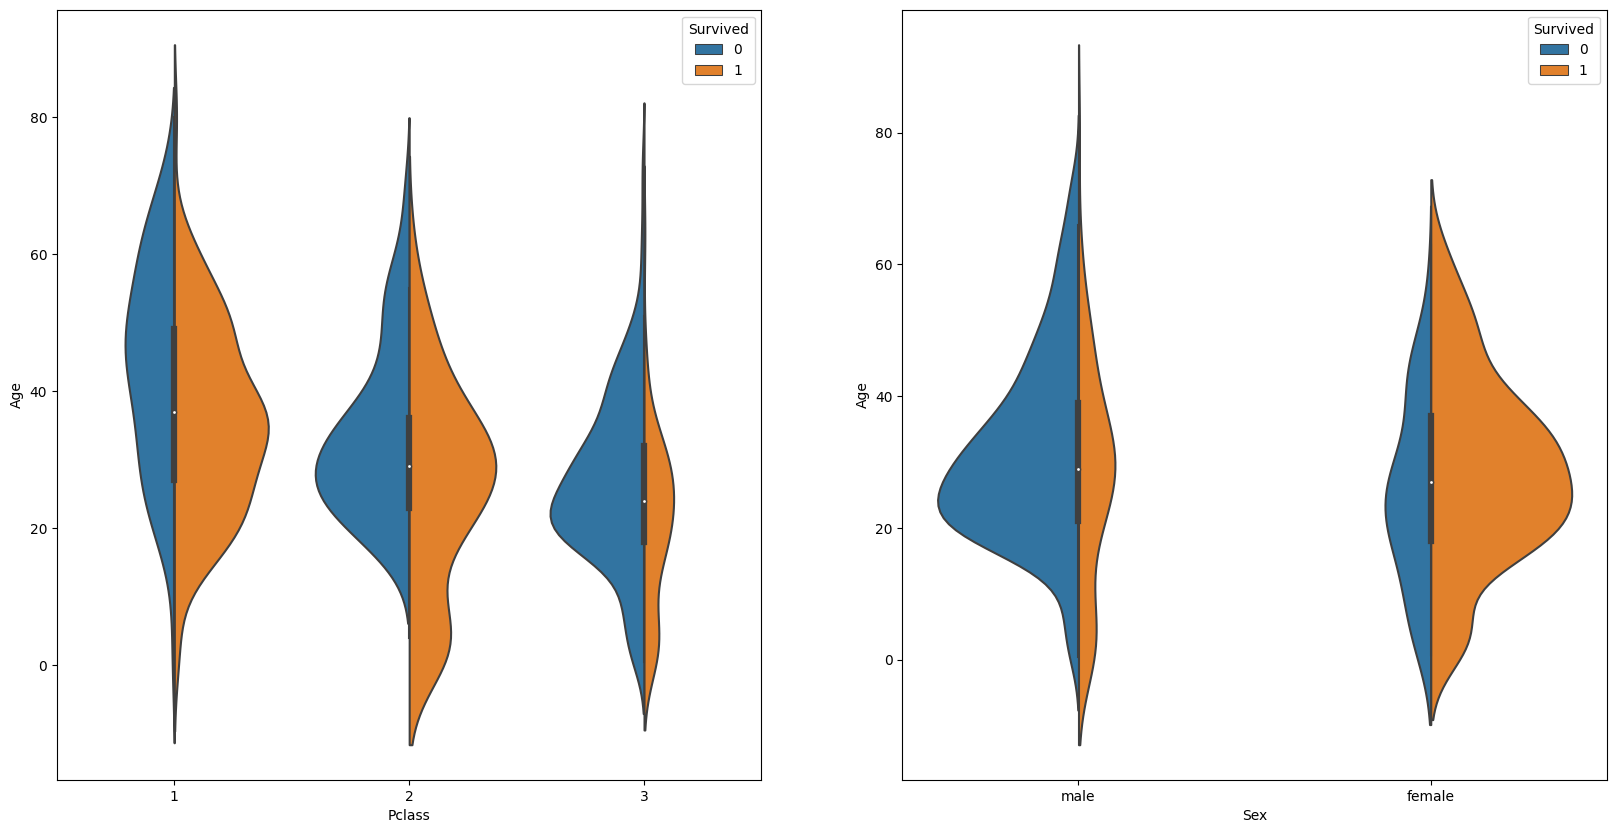

In [98]:
f, ax = plt.subplots(1, 2, figsize=(20,10))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train, scale='count', split=True, ax=ax[0])
sns.violinplot(x='Sex',y='Age',hue='Survived', data=train, scale = 'count',split=True, ax=ax[1])

## Siblings

<AxesSubplot: xlabel='SibSp'>

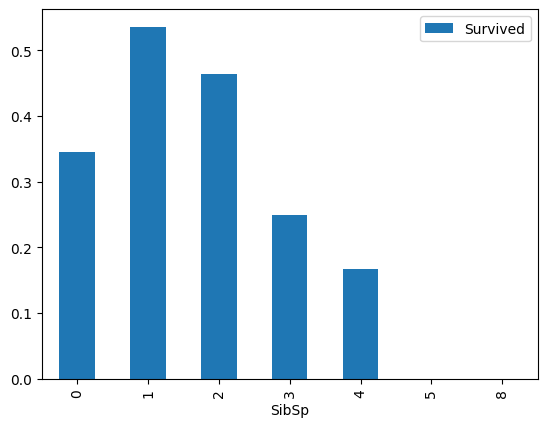

In [100]:
train[['SibSp', 'Survived']].groupby('SibSp', as_index = True).mean().plot.bar()

## Parents

<AxesSubplot: xlabel='Parch'>

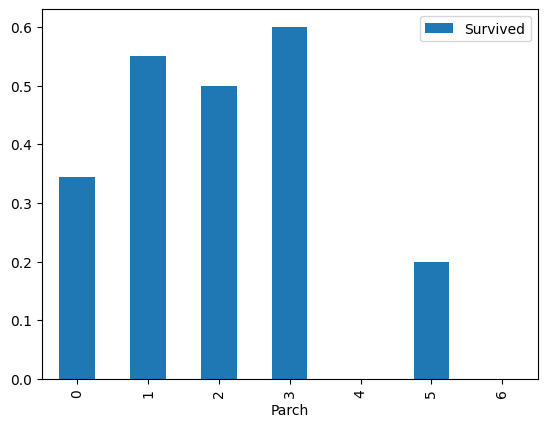

In [101]:
train[['Parch', 'Survived']].groupby('Parch', as_index = True).mean().plot.bar()

## Ticket

In [105]:
train['Ticket'].unique() # unique한 데이터가 너무 많아서 사용할 수 없음

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

# Embarked

<AxesSubplot: xlabel='Embarked'>

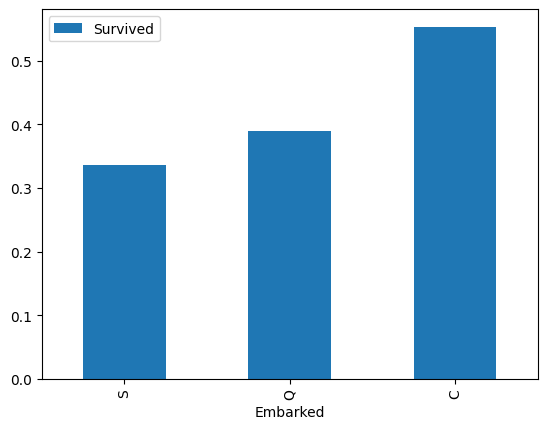

In [123]:
train[['Embarked','Survived']].groupby('Embarked').mean().sort_values(by ='Survived').plot.bar()

<AxesSubplot: xlabel='Embarked', ylabel='count'>

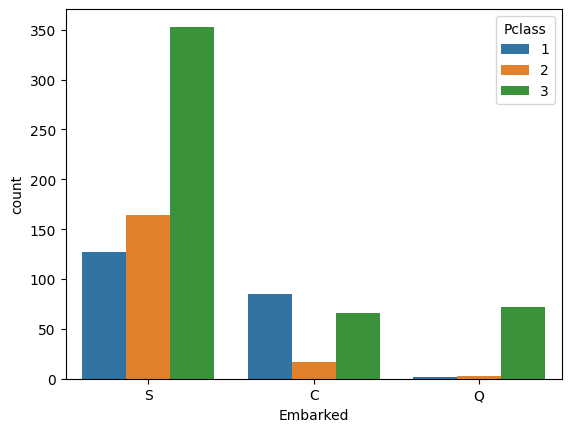

In [132]:
sns.countplot(x='Embarked', hue='Pclass', data=train)

Q는 대부분 3등석이고, C는 대략 절반이 1등석임을 알 수 있다.
-> C는 1등석 비율이 높아 생존률이 평균을 상회하는 것을 알 수 있다.

# Fare

너무 어려워서 못쓰겠음

__Features로 사용하기에 적합한 항목은 Age,Sex,Pclass 이다.__